Lets play around with a short dataset with 101 data entries and 101 features applying different optimization
methods.

### Loading dataset and liabraries

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
%matplotlib inline

data=np.loadtxt('/home/kanishk/Datasets ML/mystery.dat',delimiter=',')
x=data[:,0:100]
y=data[:,-1]

### Linear Regression

#### Error calculation on training dataset

In [115]:
from sklearn.metrics import mean_squared_error
model_1.fit(x,y)
y_hat=model_1.predict(x)
print('Mean squared error for training set: ',mean_squared_error(y,y_hat))
print('R squared error for training set: ',model_1.score(x,y))

Mean squared error for training set:  2.3651447972025995e-26
R squared error for training set:  1.0


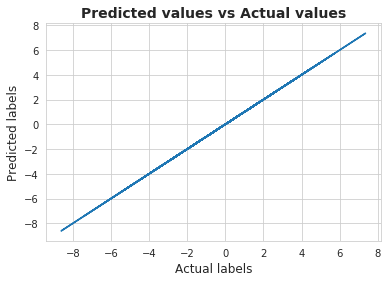

In [200]:
sns.set_style('whitegrid')
plt.plot(y,y_hat)
plt.title('Predicted values vs Actual values',fontsize=14,weight='bold')
plt.xlabel('Actual labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)
plt.show()

This shows our model fits the data too perfectly with zero error. But what about when new data arives?

#### Error calculation using cross validation score

In [124]:
model_1=LinearRegression()
mean_squared=cross_val_score(model_1,x,y,scoring='neg_mean_squared_error',cv=3)
r_2=cross_val_score(model_1,x,y,scoring='r2',cv=3)
print('Mean squared error for unknown data: ',-np.mean(mean_squared))
print('R squared error for unknown data: ',np.mean(r_2))

Mean squared error for unknown data:  8.379174979331617
R squared error for unknown data:  0.08813846852542655


The calculated error score shows that the model however fits perfectly on training data but performs poorly on
unknown data. Thus optimization is needed in case of overfitting situations like this.

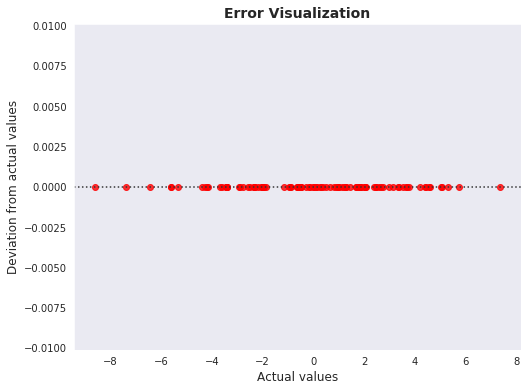

In [201]:
import seaborn as sns
sns.set_style('dark')
plt.figure(figsize=(8,6))
sns.residplot(y,y_hat,color='r')
plt.title('Error Visualization',fontsize=14,weight='bold')
plt.xlabel('Actual values',fontsize=12)
plt.ylabel('Deviation from actual values',fontsize=12)
plt.show()

We do not require to fit a polynomial regression for this as it requires a curvy residue plot. But here the 
calculated error is zero. We definitely have a overfitting problem. Hence, we equire ridge regression to overcome this.

### Ridge Regression

The value of refit is set to False in GridSearch as we are focused on error calculation using multiple scorers rather than
predicting values for future use.   

In [304]:
from sklearn.model_selection import GridSearchCV
score={'r2_score':'r2','MSE':'neg_mean_squared_error'}
alpha=[0.01,0.1,1,10,100,1000,10000]
model_2=Ridge()
GS=GridSearchCV(model_2,{'alpha':alpha},cv=3,scoring=score,refit=False)
GS.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring={'MSE': 'neg_mean_squared_error', 'r2_score': 'r2'},
             verbose=0)

In [189]:
index=np.argmin(GS.cv_results_['rank_test_r2_score'])
r_2=GS.cv_results_['mean_test_r2_score'][index]
mse=GS.cv_results_['mean_test_MSE'][index]
print('Mean squared error: ',-mse)
print('R squared error: ',r_2)

Mean squared error:  5.7523694843899555
R squared error:  0.3859973175504933


Thus, using Ridge regression with regalarization parameter(alpha) set to 10 actually brings down the error by a 
certain value for unknown data. This proves it is a better model.

### Lasso Regression

In [302]:
model_3=Lasso(random_state=1)
GS_2=GridSearchCV(model_2,{'alpha':alpha},scoring=score,refit=False,cv=3)
GS_2.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=1,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring={'MSE': 'neg_mean_squared_error', 'r2_score': 'r2'},
             verbose=0)

In [303]:
index=np.argmin(GS_2.cv_results_['rank_test_r2_score'])
r_2=GS_2.cv_results_['mean_test_r2_score'][index]
mse=GS_2.cv_results_['mean_test_MSE'][index]
print('Mean squared error: ',-mse)
print('R squared error: ',r_2)

Mean squared error:  1.925825277753625
R squared error:  0.7994212081724212


As seen Lasso worked best for the given dataset with reduced error for unknown data.

### Predicting most significant features

In [317]:
GS_3=GridSearchCV(model_2,{'alpha':alpha},scoring='neg_mean_squared_error',cv=3)
GS_3.fit(x,y)
final=GS_3.best_estimator_

In [318]:
neg={}
pos={}
for i in range(0,100):
    if final.coef_[i]<0:
        neg[i]=final.coef_[i]
    if final.coef_[i]>0:
        pos[i]=final.coef_[i]
pos=sorted(pos.items(),key=lambda x: x[1],reverse=1)
neg=sorted(neg.items(),key=lambda x: x[1])

print('Top 10 most positive features:\n',[x[0] for x in pos[0:10]])
print('Top 10 most negative features:\n',[x[0] for x in neg[0:10]])

Top 10 most positive features:
 [6, 4, 22, 18, 16, 10, 1, 12, 28, 2]
Top 10 most negative features:
 [7, 57, 67, 14, 9, 38, 85, 98, 89, 15]


### Implementing the top features in linear model

In [353]:
model_4=LinearRegression()
p=[x[0] for x in pos[0:12]]
score=cross_val_score(mod,x[:,p],y,cv=3)
score.mean()

0.8718052715155382

Atlast choosing the correct features gave us the best results even with simple linear regression.